In [ ]:
# from __future__ import print_function
!python -m pip install cmocean
!python -m pip install planetaryimage
#!python -m pip install pvl
#!python -m pip install plotly
#!python -m pip install Plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 1.8 MB/s 


In [ ]:
!python -m pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 29.1 MB/s 


In [ ]:
#from chart_studio import plotly
from rasterio import rasterio
import numpy as np
#from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import datetime
import imageio
import sys
import os
import urllib
# import planetaryimage as pim
from planetaryimage import PDS3Image

In [ ]:
imloc = {}

In [ ]:
filepath = os.path.join("Data", "02NASA_Cassini", "PDS_Imaging_Node")
os.makedirs(filepath,exist_ok=True)

basename = 'N1358696192_2'
imloc[basename] = {'PDSNode':{}}
try:
    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_1005/data/1358693462_1358707324/N1358696192_2.IMG',
                                                   filepath + os.sep + basename + '.IMG')
    imloc[basename]['PDSNode']['IMG'] = mypath

    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_1005/data/1358693462_1358707324/N1358696192_2.LBL',
                                                   filepath + os.sep + basename + '.LBL')
    imloc[basename]['PDSNode']['LBL'] = mypath

    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_1005/extras/browse/1358693462_1358707324/N1358696192_2.IMG.jpeg',
                                                   filepath + os.sep + basename + '.IMG.jpeg')
    imloc[basename]['PDSNode']['JPG'] = mypath

    print('Download successful')
    print(imloc[basename]['PDSNode'])

except Exception as ex:
    print('Data cold not be retrieved !!')
    print('='*50)
    print(ex)
    print('-'*50)

Download successful
{'IMG': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.IMG', 'LBL': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.LBL', 'JPG': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.IMG.jpeg'}


In [ ]:
imdata = {}
for key, value in imloc.items():
    print('='*50)
    print('Loading PDS Imaging Node dataset ',key)
    print('-'*50)
    imdata[key] = {}

    print('Attempt to read PDS image: ', value['PDSNode']['LBL'])
    imdata[key]['PDSNode:PDS'] = PDS3Image.open(value['PDSNode']['LBL'])
    print('\tImage Shape: ', imdata[key]['PDSNode:PDS'].shape)
    print('\tImage dtype: ', imdata[key]['PDSNode:PDS'].dtype)
    print('\tImage range: (', imdata[key]['PDSNode:PDS'].image.min(),',',imdata[key]['PDSNode:PDS'].image.max(),')')

    print('Attempt to read JPG image: ', value['PDSNode']['JPG'])
    imdata[key]['PDSNode:JPG'] = imageio.imread(value['PDSNode']['JPG'])
    print('\tImage Shape: ', imdata[key]['PDSNode:JPG'].shape)
    print('\tImage dtype: ', imdata[key]['PDSNode:JPG'].dtype)
    print('\tImage range: (', imdata[key]['PDSNode:JPG'].min(),',',imdata[key]['PDSNode:JPG'].max(),')')

Loading PDS Imaging Node dataset  N1358696192_2
--------------------------------------------------
Attempt to read PDS image:  Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.LBL
	Image Shape:  (1, 1024, 1024)
	Image dtype:  int8
	Image range: ( -128 , 127 )
Attempt to read JPG image:  Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.IMG.jpeg
	Image Shape:  (256, 256)
	Image dtype:  uint8
	Image range: ( 0 , 255 )


(1, 1024, 1024)
(1024, 1024)


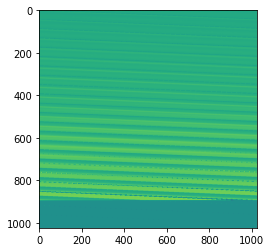

In [ ]:
for key in imdata.keys():
  print(imdata[key]['PDSNode:PDS'].shape)
  print(imdata[key]['PDSNode:PDS'].image.shape)
  _ = plt.figure()
  plt.imshow(imdata[key]['PDSNode:PDS'].image)

N1358696192_2


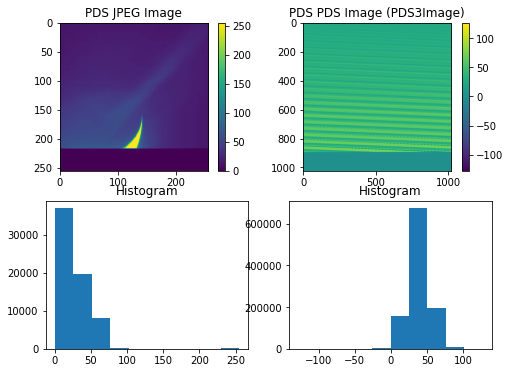

In [ ]:
key = list(imdata.keys())[0]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,3)
plt.hist(imdata[key]['PDSNode:JPG'].flatten())
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(imdata[key]['PDSNode:PDS'].image)
plt.colorbar()
plt.title('PDS PDS Image (PDS3Image)')

plt.subplot(2,2,4)
plt.hist(imdata[key]['PDSNode:PDS'].image.flatten())
plt.title('Histogram')
plt.show()

In [ ]:
imdata[key]['PDSNode:PDS'].image
ImageLBL = rasterio.open("/content/Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.LBL").read()
#plt.figure()

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
imdata[key]['PDSNode:PDS'].image

array([[76, 66, 76, ..., 95, 78, 65],
       [77, 69, 61, ..., 69, 68, 95],
       [83, 84, 65, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

N1358696192_2


Text(0.5, 1.0, 'PDS Image LBL (PDS3Image)')

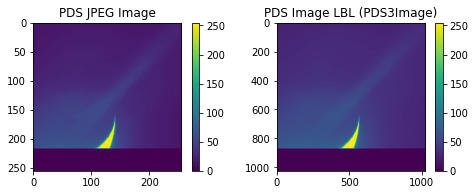

In [ ]:
key = list(imdata.keys())[0]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,2)
plt.imshow(ImageLBL[0])
plt.colorbar()
plt.title('PDS Image LBL (PDS3Image)')

N1358696192_2


Text(0.5, 1.0, 'Histogram')

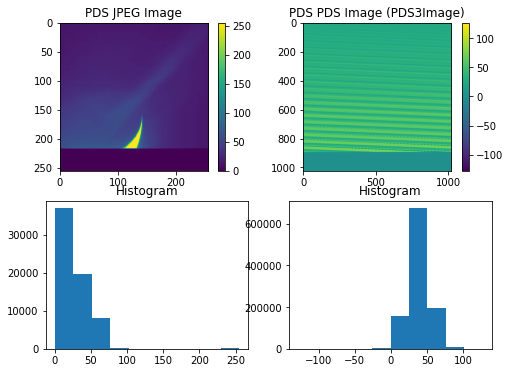

In [ ]:
key = list(imdata.keys())[0]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,3)
plt.hist(imdata[key]['PDSNode:JPG'].flatten())
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(imdata[key]['PDSNode:PDS'].image)
plt.colorbar()
plt.title('PDS PDS Image (PDS3Image)')

plt.subplot(2,2,4)
plt.hist(imdata[key]['PDSNode:PDS'].image.flatten())
plt.title('Histogram')

N1358696192_2


Text(0.5, 1.0, 'Histogram')

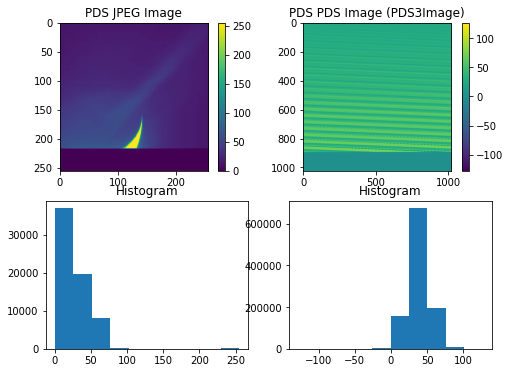

In [ ]:
key = list(imdata.keys())[0]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,3)
plt.hist(imdata[key]['PDSNode:JPG'].flatten())
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(imdata[key]['PDSNode:PDS'].image)
plt.colorbar()
plt.title('PDS PDS Image (PDS3Image)')

plt.subplot(2,2,4)
plt.hist(imdata[key]['PDSNode:PDS'].image.flatten())
plt.title('Histogram')

In [ ]:
imdata[key]

{'PDSNode:PDS': Data/02NASA_Cassini/PDS_Imaging_Node/N1358696192_2.LBL,
 'PDSNode:JPG': Array([[18, 16, 14, ..., 20, 24, 30],
        [18, 16, 14, ..., 20, 24, 30],
        [18, 16, 14, ..., 20, 24, 30],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)}

In [ ]:
imdata[key]['PDSNode:JPG']

Array([[18, 16, 14, ..., 20, 24, 30],
       [18, 16, 14, ..., 20, 24, 30],
       [18, 16, 14, ..., 20, 24, 30],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
imdata[key]['PDSNode:JPG']

Array([[18, 16, 14, ..., 20, 24, 30],
       [18, 16, 14, ..., 20, 24, 30],
       [18, 16, 14, ..., 20, 24, 30],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
imdata[key]['PDSNode:PDS'].image

array([[76, 66, 76, ..., 95, 78, 65],
       [77, 69, 61, ..., 69, 68, 95],
       [83, 84, 65, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)